In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import io
file_name = 'corona_tested_individuals_ver_0083.english.csv'
# df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df = pd.read_csv(file_name)

In [4]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [5]:
df.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-06-08,0,0,0,0,0,negative,NaN,female,Other
1,2020-04-19,0,0,0,0,0,negative,Yes,male,Other
2,2020-09-12,0,0,0,0,0,negative,No,male,Other
3,2020-10-18,0,0,0,0,0,negative,No,female,Other
4,2020-09-15,0,0,0,0,0,negative,No,male,Other
5,2020-10-26,0,0,0,0,0,negative,No,female,Other
6,2020-08-17,0,0,0,0,0,negative,No,female,Other
7,2020-11-06,0,0,0,0,0,negative,No,female,Other
8,2020-11-12,0,0,0,0,0,negative,No,male,Other
9,2020-04-14,0,0,0,0,0,negative,No,male,Other


In [6]:
df = df.drop(['test_date'], axis=1)

In [7]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,NaN,female,Other
1,0,0,0,0,0,negative,Yes,male,Other
2,0,0,0,0,0,negative,No,male,Other
3,0,0,0,0,0,negative,No,female,Other
4,0,0,0,0,0,negative,No,male,Other


In [8]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [9]:
df = df.reindex(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'corona_result'], axis=1)
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,NaN,female,Other,negative
1,0,0,0,0,0,Yes,male,Other,negative
2,0,0,0,0,0,No,male,Other,negative
3,0,0,0,0,0,No,female,Other,negative
4,0,0,0,0,0,No,male,Other,negative
...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,1,No,male,Contact with confirmed,positive
1496,0,0,0,0,0,No,female,Other,negative
1497,0,0,0,0,0,No,male,Other,negative
1498,0,0,0,0,0,NaN,NaN,Other,negative


In [10]:
df = df.rename(columns={'corona_result': 'target'})
print(df)

      cough  fever  sore_throat  shortness_of_breath  head_ache  \
0         0      0            0                    0          0   
1         0      0            0                    0          0   
2         0      0            0                    0          0   
3         0      0            0                    0          0   
4         0      0            0                    0          0   
...     ...    ...          ...                  ...        ...   
1495      0      0            0                    0          1   
1496      0      0            0                    0          0   
1497      0      0            0                    0          0   
1498      0      0            0                    0          0   
1499      0      0            0                    0          0   

     age_60_and_above  gender         test_indication    target  
0                 NaN  female                   Other  negative  
1                 Yes    male                   Other  negative

In [11]:
df.shape

(1500, 9)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(1220, 9)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df['target'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [16]:
df = df[~df.target.str.contains("other")]

In [17]:
df['target'].unique()

array(['negative', 'positive'], dtype=object)

In [18]:
df['age_60_and_above'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [20]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,target
0,0,0,0,0,0,Yes,male,Other,negative
1,0,0,0,0,0,No,male,Other,negative
2,0,0,0,0,0,No,female,Other,negative
3,0,0,0,0,0,No,male,Other,negative
4,0,0,0,0,0,No,female,Other,negative


In [21]:
import pandas as pd

In [22]:
df.target = pd.Categorical(df.target)
df['target'] = df.target.cat.codes



In [23]:

df['target'].value_counts()

0    1079
1     127
Name: target, dtype: int64

In [24]:
count_class_0, count_class_1 = df['target'].value_counts()

df_class_0= df[df['target']==0]
df_class_1= df[df['target']==1]

print(df_class_0.shape)

df_class_1.shape

(1079, 9)


(127, 9)

In [25]:
df['target'].value_counts()

0    1079
1     127
Name: target, dtype: int64

In [26]:

df_class_1_over= df_class_1.sample(1366, replace=True)
df=pd.concat([df_class_0, df_class_1_over], axis=0)



In [27]:
df['target'].value_counts()

1    1366
0    1079
Name: target, dtype: int64

In [28]:
df = df.sample(frac = 1) 

In [29]:
val_df = df.sample(frac=0.20, random_state=133)
train_df = df.drop(val_df.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_df), len(val_df))
)

Using 1051 samples for training and 489 for validation


In [30]:
def dataframe_to_dataset(df):  
    df = df.copy()  
    labels = df.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds


train_ds = dataframe_to_dataset(train_df)
val_ds = dataframe_to_dataset(val_df)
val_ds_test = val_ds

In [31]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'cough': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fever': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sore_throat': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'shortness_of_breath': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'head_ache': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'age_60_and_above': <tf.Tensor: shape=(), dtype=string, numpy=b'Yes'>, 'gender': <tf.Tensor: shape=(), dtype=string, numpy=b'female'>, 'test_indication': <tf.Tensor: shape=(), dtype=string, numpy=b'Other'>}
Target: tf.Tensor(0, shape=(), dtype=int8)


In [32]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [33]:
from numpy import array
from keras.layers import Conv1D, MaxPooling1D, Embedding, merge, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature

Using TensorFlow backend.


In [34]:
# Categorical features encoded as integers
cough = keras.Input(shape=(1,), name="cough",  dtype="int64")
fever = keras.Input(shape=(1,), name="fever",  dtype="int64")
sore_throat = keras.Input(shape=(1,), name="sore_throat",  dtype="int64")
shortness_of_breath = keras.Input(shape=(1,), name="shortness_of_breath",  dtype="int64")
head_ache = keras.Input(shape=(1,), name="head_ache",  dtype="int64")

# Categorical feature encoded as string
age_60_and_above = keras.Input(shape=(1,), name="age_60_and_above", dtype="string")
gender = keras.Input(shape=(1,), name="gender", dtype="string")
test_indication = keras.Input(shape=(1,), name="test_indication", dtype="string")
all_inputs = [
    cough,
    fever,
    sore_throat,
    shortness_of_breath,
    head_ache,
    age_60_and_above,
    gender,
    test_indication,
]

# Integer categorical features

cough_encoded = encode_integer_categorical_feature(cough, "cough", train_ds)
fever_encoded = encode_integer_categorical_feature(fever, "fever", train_ds)
sore_throat_encoded = encode_integer_categorical_feature(sore_throat, "sore_throat", train_ds)
shortness_of_breath_encoded = encode_integer_categorical_feature(shortness_of_breath, "shortness_of_breath", train_ds)
head_ache_encoded = encode_integer_categorical_feature(head_ache, "head_ache", train_ds)

# String categorical features
age_60_and_above_encoded = encode_string_categorical_feature(age_60_and_above, "age_60_and_above", train_ds)
gender_encoded = encode_string_categorical_feature(gender, "gender", train_ds)
test_indication_encoded = encode_string_categorical_feature(test_indication, "test_indication", train_ds)

all_features = layers.concatenate(
    [
        cough_encoded,
        fever_encoded,
        sore_throat_encoded,
        shortness_of_breath_encoded,
        head_ache_encoded,
        age_60_and_above_encoded,
       gender_encoded,
       test_indication_encoded,
    ]
    )



x = layers.Dense(8, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [35]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [36]:
# fit the keras model on the dataset
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
33/33 [==============================] - 0s 8ms/step - loss: 0.7614 - accuracy: 0.5147 - val_loss: 0.7213 - val_accuracy: 0.4867
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6784 - val_loss: 0.7325 - val_accuracy: 0.4499
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7364 - val_loss: 0.7506 - val_accuracy: 0.4581
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7412 - val_loss: 0.7647 - val_accuracy: 0.4581
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.8221 - val_loss: 0.7717 - val_accuracy: 0.4560
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8126 - val_loss: 0.7748 - val_accuracy: 0.4560
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.8183 - val_loss: 0.7730 - val_accuracy: 0.4601
Epoch 8/10
33/33 [==

In [37]:
sample = {
    "cough": 1,
    "fever": 1,
    "sore_throat": 1,
    "shortness_of_breath": 1,
    "head_ache": 1,
    "age_60_and_above": 'yes',
    "gender": 'female',
    "test_indication": 'other'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a corona disease, as evaluated by our model." % (100 * predictions[0][0],)
)

This particular patient had a 73.6 percent probability of having a corona disease, as evaluated by our model.


In [38]:
sample = {
    "cough": 1,
    "fever": 1,
    "sore_throat": 1,
    "shortness_of_breath": 1,
    "head_ache": 1,
    "age_60_and_above": 'yes',
    "gender": 'male',
    "test_indication": 'contact with confirmed'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a corona disease, as evaluated by our model." % (100 * predictions[0][0],)
)

This particular patient had a 79.0 percent probability of having a corona disease, as evaluated by our model.


In [39]:
import tensorflow.keras.backend as kb
kb.eval(model.optimizer)
kb.eval(model.optimizer.learning_rate)


0.001

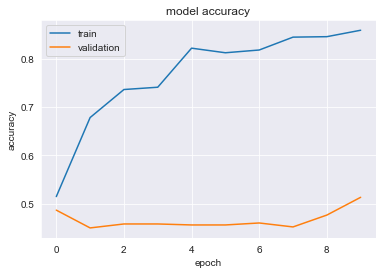

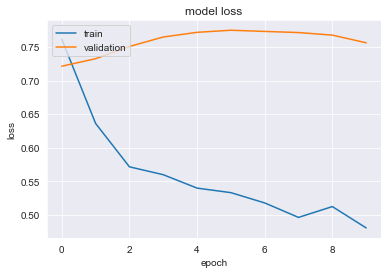

In [40]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [41]:
# evaluate the keras model
_, accuracy = model.evaluate(val_ds)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 873us/step - loss: 0.7562 - accuracy: 0.5133
Accuracy: 51.33


In [42]:
predict_values_prob = model.predict(val_ds)


In [43]:
predict_values = np.round(predict_values_prob)

  

In [44]:
dataset = val_df.values
y_class_original = list(dataset[:,8])


In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_class_original, predict_values)
print(cm)

[[198  14]
 [246  31]]


<AxesSubplot:>

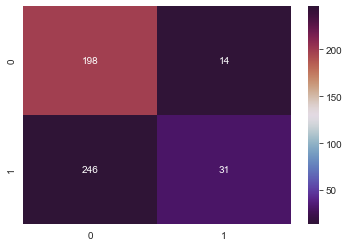

In [46]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='twilight_shifted', fmt='g')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_class_original, predict_values
))

              precision    recall  f1-score   support

           0       0.45      0.93      0.60       212
           1       0.69      0.11      0.19       277

    accuracy                           0.47       489
   macro avg       0.57      0.52      0.40       489
weighted avg       0.58      0.47      0.37       489

